In [17]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('E_commerce_cosmetic_dataset.csv', encoding='latin1')  
df.dropna(inplace=True)
label_encoder = LabelEncoder()
categorical_columns = ['website', 'country', 'category', 'brand', 'subcategory', 'form', 'type', 'color']
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
df.head()

,product_name,website,country,category,subcategory,title-href,price,brand,ingredients,form,type,color,size,rating,noofratings
17,Deadsea Mud Purifying Mud Soap,1,1,0,1,https://www.ulta.com/p/deadsea-mud-purifying-m...,980.4,3,"Pottasium Lauryl Sulfate, Disodium Lauryl Sulf...",0,14,1236,102,4.7,28
18,Natural Dead Sea Bath Salts,1,1,0,1,https://www.ulta.com/p/natural-dead-sea-bath-s...,980.4,3,100% Dead Sea salt,0,14,1236,255,4,1
20,Sea-Kissed Mineral Shower Gel,1,1,0,1,https://www.ulta.com/p/sea-kissed-mineral-show...,1960.8,3,"Aqua (Mineral Spring Water), Ammonium Lauryl S...",0,14,1236,204,4.7,13
21,Mineral Botanic Velvet Cream Wash,1,1,0,1,https://www.ulta.com/p/mineral-botanic-velvet-...,1960.8,3,"Aqua (Water), Ammonium Laureth Sulfate, Cocami...",0,14,1236,510,4.7,301
22,Eucalyptus Bath Salt,1,1,0,1,https://www.ulta.com/p/eucalyptus-bath-salt-xl...,2124.2,3,"100% Dead Sea salt, Fragrance",0,14,1236,960,4.5,39


In [19]:
df.columns

Index(['product_name', 'website', 'country', 'category', 'subcategory',
       'title-href', 'price', 'brand', 'ingredients', 'form', 'type', 'color',
       'size', 'rating', 'noofratings'],
      dtype='object')

In [20]:
cleaned_df = df[['product_name', 'website', 'country', 'category', 'subcategory', 'price', 'brand', 'ingredients', 'form', 'type', 'color',
       'size', 'rating', 'noofratings' ]]
cleaned_df.head()

,product_name,website,country,category,subcategory,price,brand,ingredients,form,type,color,size,rating,noofratings
17,Deadsea Mud Purifying Mud Soap,1,1,0,1,980.4,3,"Pottasium Lauryl Sulfate, Disodium Lauryl Sulf...",0,14,1236,102,4.7,28
18,Natural Dead Sea Bath Salts,1,1,0,1,980.4,3,100% Dead Sea salt,0,14,1236,255,4,1
20,Sea-Kissed Mineral Shower Gel,1,1,0,1,1960.8,3,"Aqua (Mineral Spring Water), Ammonium Lauryl S...",0,14,1236,204,4.7,13
21,Mineral Botanic Velvet Cream Wash,1,1,0,1,1960.8,3,"Aqua (Water), Ammonium Laureth Sulfate, Cocami...",0,14,1236,510,4.7,301
22,Eucalyptus Bath Salt,1,1,0,1,2124.2,3,"100% Dead Sea salt, Fragrance",0,14,1236,960,4.5,39


In [21]:
vectorizer = CountVectorizer(stop_words='english', max_features=100)
ingredients_matrix = vectorizer.fit_transform(df['ingredients'])

In [24]:
ingredients_df = pd.DataFrame(ingredients_matrix.toarray(), columns=vectorizer.get_feature_names_out())
ingredients_df.head()

,10,15850,19140,20,30,42090,77491,77492,77499,77891,...,synthetic,titanium,tocopherol,tocopheryl,triglyceride,water,wax,xanthan,yellow,½ï
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


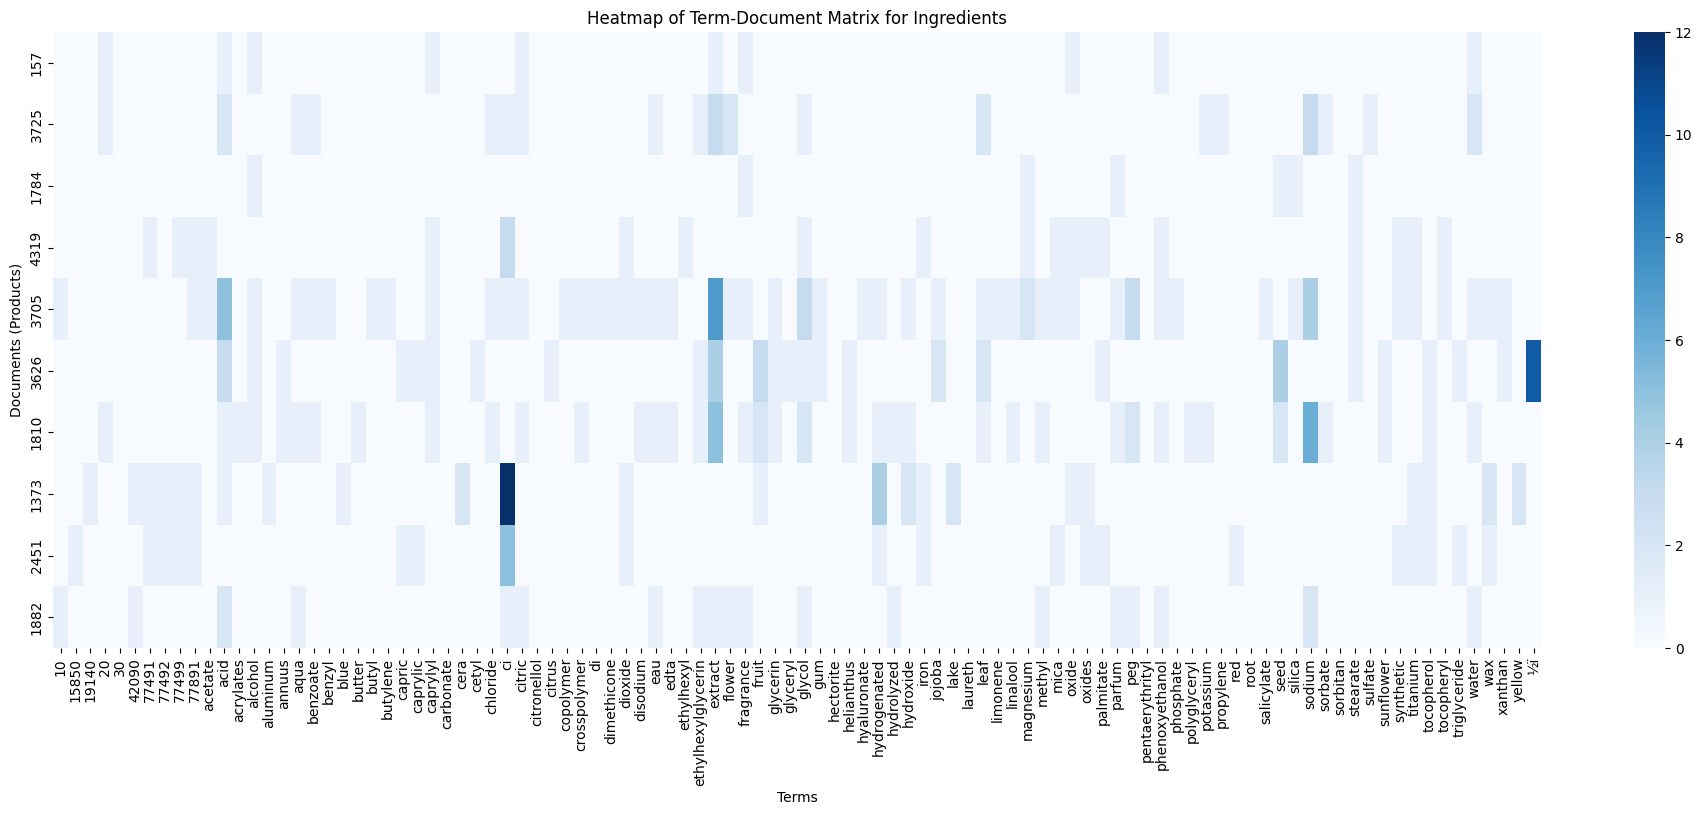

In [26]:
sample_df = ingredients_df.sample(10, random_state=1)

plt.figure(figsize=(24, 8))
sns.heatmap(sample_df, annot=False, cmap='Blues')
plt.title('Heatmap of Term-Document Matrix for Ingredients')
plt.xlabel('Terms')
plt.ylabel('Documents (Products)')
plt.show()
